#**Introduction**

A teleommunication  is a company , it's customers churned in the last period. Telco Co. has contracted with me on a project to build a predictive model that meets the following business requireents:

Find the best initial prediction model to classify customer churn risk
Model performance should do significantly better than using "averages"
Deliverables should explain the relative influence that each predictor has on the overall model predictions
Deliverables should suggest potential solutions to reducing customer churn

#**Attribute information:**

Demographics
* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
 
# Location

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

# Services

* Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

# Churn Status

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

#Import Libraries

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as mns

#Load File

In [2]:
#importing the dateset
tel = pd.read_excel("t.xlsx")# Reading the data set
tel.head() #using header function it will print first 5 rows


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


In [ ]:
#Checking for rows and columns
tel.shape


(7043, 33)

In [ ]:
#calculata mean ,max ,min ,count,etc
tel.describe().transpose () 

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


This dataset doesn't have any duplicate values. It's a good sign.

In [ ]:
tel.duplicated().sum()# cheching for Duplicate Values

0

In [ ]:
tel.isnull().sum()#Identifying null values and cummulating(adding) the all the values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
tel.columns# checking for column in dataset

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

##Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

#Measure of datatype in  statistically 



1.   CustomerID-Quantitative-discreet type data

2.   Count:Quantitative-discreet type data

3.   Country:qualitative-nominal 

4.   City:qualitative-nominal 

5.   Zipcode:qualitative-nominal 

6.   Lat Long:Quantitative-contineous
7.   Longitude:Quantitative-contineous


8.   Gender:qualitative-nominal 


9.   Senior Citizen:qualitative-nominal 


10.   Partner:qualitative-nominal 


11.   Dependents:qualitative-nominal 


12.   Tenure Months:Quantitative-discreet type data

13.   Phone Service:qualitative-nominal  type data
14.   Multiple Lines:qualitative-nominal  type data

15.   Internet Service:qualitative-nominal  type data

16.   Online Security:qualitative-nominal  type data
17.   Online Backup: qualitative-nominal  type data


18.   Device Protection:qualitative-nominal  type data

19.   Tech Support:qualitative-nominal  type data
20.   Streaming TV:qualitative-nominal  type data


21.   Streaming Movies:qualitative-nominal  type data

22.   Contract:qualitative-nominal  type data

23.   Paperless Billing:Quantitative-discreet type data
24.   Payment Method:qualitative-nominal  type data


25.   Monthly Charge: Quantitative-continuos type of data


26.   Total Charges:Quantitative-continuos type of data
27.   Churn Label: qualitative-nominal 
28.   Churn Value:Quantitative-discreet type data
29. Churn Score:Quantitative-discreet type data
30. CLTV: Quantitative-discreet type data
31. Churn Reason:qualitative-nominal  type data
32. state:qualitative-nominal  type data
33. Latitude-Quantitative-contineous type data










#Python Data Type

In [ ]:
tel.info()#checking of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
data_type_python = pd.DataFrame(tel.dtypes).T.rename({0:'python data types'})
data_type_python

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
python data types,object,float64,object,object,object,float64,object,float64,float64,object,...,object,object,object,float64,object,object,float64,float64,float64,object


#Unexpected Data Types:
 * Count ,zip code ,Tenure Months , Churn Value ,Churn Score  ,Churn Score 
   ,CLTV this columns are python is reading float64 datatype but     
   actually should be int64 datatype


*    Lat Long ,Total Charges column python is reading  object datatype its should be float64 datatype
 






##Q2: Please apply appropriate statistical measures using python based on data types.

In [ ]:
statistical_measures=tel[['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']]# Claculating statistical measures using python for columns
statistical_measures.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,2.0,53.85,108.15,86.0,3239.0
1,2.0,70.70,151.65,67.0,2701.0
2,8.0,99.65,820.5,86.0,5372.0
3,28.0,104.80,3046.05,84.0,5003.0
4,49.0,103.70,5036.3,89.0,5340.0


In [ ]:
statistical_measures['Total Charges'] = pd.to_numeric(statistical_measures['Total Charges'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
 statistical_measures['Total Charges'].astype(float)# changing the 'Total charges' data type string to float

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [ ]:
statistical_measures.describe() # Calculating the  mean ,max, min other statistical measures

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,58.699418,4400.295755
std,24.559481,30.090047,2266.771362,21.525131,1183.057152
min,0.000000,18.250000,18.800000,5.000000,2003.000000
25%,9.000000,35.500000,401.450000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475000,61.000000,4527.000000
75%,55.000000,89.850000,3794.737500,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,100.000000,6500.000000


In [ ]:
statistical_measures.mode()#mode

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,1.0,20.05,20.2,80.0,5546.0


In [ ]:
statistical_measures.var()#variance

Tenure Months      6.031681e+02
Monthly Charges    9.054109e+02
Total Charges      5.138252e+06
Churn Score        4.633313e+02
CLTV               1.399624e+06
dtype: float64

In [ ]:
statistical_measures.std()# Calculating standard deviation of above mention columns.

Tenure Months        24.559481
Monthly Charges      30.090047
Total Charges      2266.771362
Churn Score          21.525131
CLTV               1183.057152
dtype: float64

In [ ]:
sns.boxplot(x = 'Tenure Months' )   

In [ ]:
#Interquartile Range Calculator 
q3, q1 =np.percentile(statistical_measures, [75 , 25])
iqr = q3 -q1
iqr 

#Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

Female are 49.5 % and senior citizen 16.2% in dataset . i am using pie plot because pie plot is a circular statistical chart, which is divided into sectors to illustrate numerical proportion

In [ ]:
a=tel['Gender'].value_counts()#counting the male and female
a


Male      3555
Female    3488
Name: Gender, dtype: int64

In [ ]:
f=tel['Senior Citizen'].value_counts()#counting the Senior Citizen
f

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

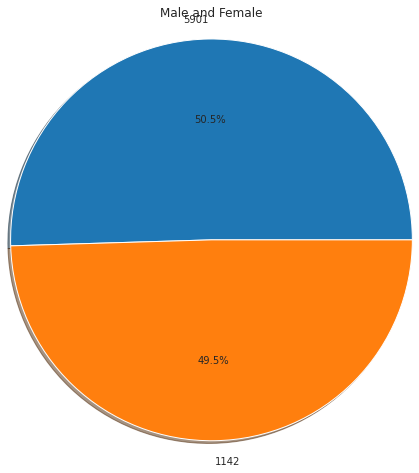

In [ ]:
plt.figure(figsize=(6,8))
plt.axis("equal")
plt.pie(a,labels = f,radius=1.5 ,autopct='%0.1f%%' ,shadow =True)# Creating a pie plot
plt.title('Male and Female')
plt.show()# show plot

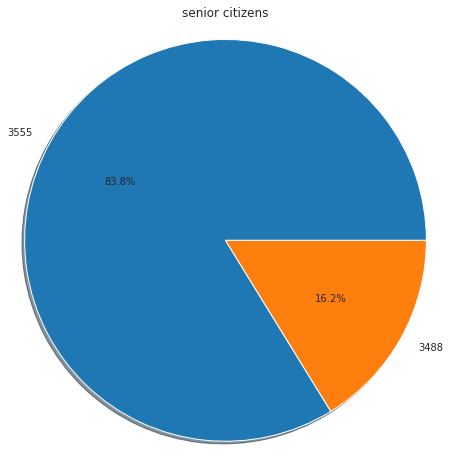

In [ ]:
plt.figure(figsize=(6,8))
plt.axis("equal")
plt.pie(f,labels = a,radius=1.5 ,autopct='%0.1f%%' ,shadow =True)# Creating a pie plot
plt.title('senior citizens')
plt.show()# show plot

##Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

AS for distplot fig it is bimodal distribution  there are two lumbs and skew is 0.23 so tenure month column  is symmetric ,it is range -0.5 to 0.5 so the above distribution is  symmetric.calculating  the median

selecting for tenure Months

In [ ]:
tel['Tenure Months']


0        2.0
1        2.0
2        8.0
3       28.0
4       49.0
        ... 
7038    72.0
7039    24.0
7040    72.0
7041    11.0
7042    66.0
Name: Tenure Months, Length: 7043, dtype: float64

creating plot which distribute the Tenure months

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

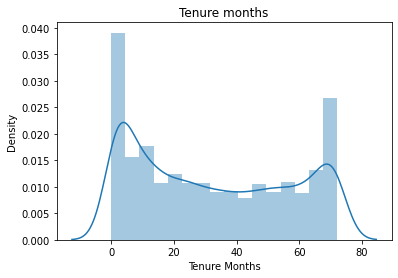

In [ ]:
sns.distplot(tel['Tenure Months'] )# creating plot which distribute the Tenure months
plt.figure(figsize=(6,8))
plt.title("Tenure months")
plt.show()# show plot

checking symmetric or skewed by using skew function

In [ ]:
tel['Tenure Months'].skew()


0.2395397495619829

checking for median 

In [ ]:
tel['Tenure Months'].median()

29.0

In [ ]:
tel['Tenure Months'].describe().transpose () 

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

* The box plot also we can absorved that data is not skewed and it is symmetrical.

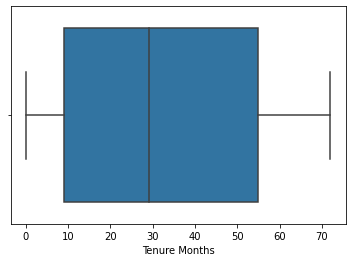

<Figure size 864x576 with 0 Axes>

In [6]:
sns.boxplot(x = 'Tenure Months' ,data = tel)   # Creating Box plot and checking weather the data is skewed or not.
plt.figure(figsize=(12,8))
plt.show()


* we can calculate IQR = Q3-Q1
* IQR =46 months


In [17]:
q3, q1 =np.percentile(tel['Tenure Months'], [75 , 25])
iqr = q3 -q1
iqr

46.0

##Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one

selecting for all binary columns and assigning a binary_columns variable

In [7]:
binary_columns=['Country','State','City','Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Churn Label','Churn Reason']

converting 0 and 1 for all binary columns

In [ ]:
gender_dummies = pd.get_dummies (binary_columns)# creating 0 and 1 for all binary columns assigning  the dummer varable
gender_dummies.head(10)


,Churn Label,Churn Reason,City,Contract,Country,Dependents,Device Protection,Gender,Internet Service,Multiple Lines,...,Online Security,Paperless Billing,Partner,Payment Method,Phone Service,Senior Citizen,State,Streaming Movies,Streaming TV,Tech Support
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

* There is a  must difference in Monthly Charges and gender wise

* The median line is also on the top side of the box plot.






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


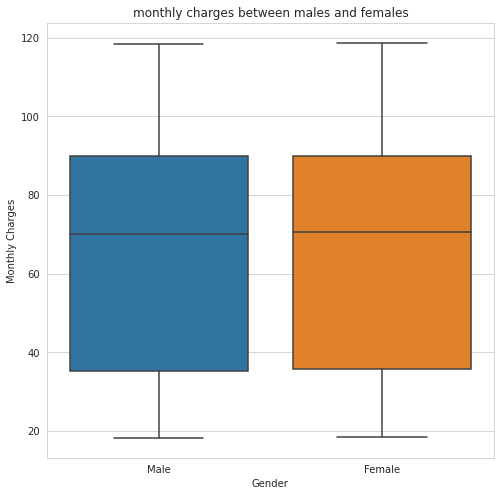

In [ ]:
sns.set_style("whitegrid")# for boxplot appling white grid pattren
plt.figure(figsize=(8,8))
plt.title("monthly charges between males and females")
sns.boxplot(tel['Gender'], tel['Monthly Charges'])
plt.show()# printing the result


#Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

subset the two column and assigning 'ho' variable

In [ ]:
ho=tel[['Total Charges','City']]
ho.head()

,Total Charges,City
0,108.15,Los Angeles
1,151.65,Los Angeles
2,820.5,Los Angeles
3,3046.05,Los Angeles
4,5036.3,Los Angeles


Checking for datatype by using info function

In [ ]:
ho.info()# calculating  the information of the above varible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Total Charges  7043 non-null   object
 1   City           7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


It's not null, but a blank space ' '. So, I will use errors = coerce parameter to set the invalid parsing (blank space) as NaN.

In [ ]:
ho['Total Charges'] = pd.to_numeric(ho['Total Charges'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Changing type convsertion as float

In [ ]:
 ho['Total Charges'].astype(float)

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

Filltering the Los Angeles city

In [ ]:
i=ho[(ho['City']=='Los Angeles')]
i.head()

,Total Charges,City
0,108.15,Los Angeles
1,151.65,Los Angeles
2,820.50,Los Angeles
3,3046.05,Los Angeles
4,5036.30,Los Angeles


min toal charges in los angeles city

In [ ]:
i.min()# checking for min charges in los angeles city

Total Charges           18.8
City             Los Angeles
dtype: object

creating a box plot checking the max and min , mean  values

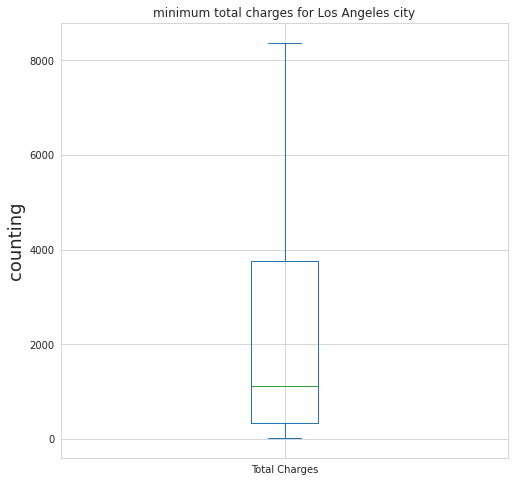

In [ ]:
i.plot(kind='box',figsize=(8,8)).set(title='minimum total charges for Los Angeles city')
plt.ylabel('counting', size=18)
plt.show()# printing the result


subset the two column and assigning 'to' variable

In [ ]:
to=tel[['Zip Code','Total Charges']]
to.head()

,Zip Code,Total Charges
0,90003.0,108.15
1,90005.0,151.65
2,90006.0,820.5
3,90010.0,3046.05
4,90015.0,5036.3


Checking for datatype by using info function

In [ ]:
to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zip Code       7043 non-null   float64
 1   Total Charges  7043 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


It's not null, but a blank space ' '. So, I will use errors = coerce parameter to set the invalid parsing (blank space) .

In [ ]:
to['Total Charges'] = pd.to_numeric(to['Total Charges'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Changing type convsertion as float

In [ ]:
 to['Total Charges'].astype(float)

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [ ]:
to.max()# checking for max charges and zip code

Zip Code         96161.0
Total Charges     8684.8
dtype: float64

zip code 96161 has the highest total charges and max total charges is 8684.8

#Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

 As per box plot it is clear that Electronic check is highest churn score  and bank transfer ,credit card (automatic) as low churn score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


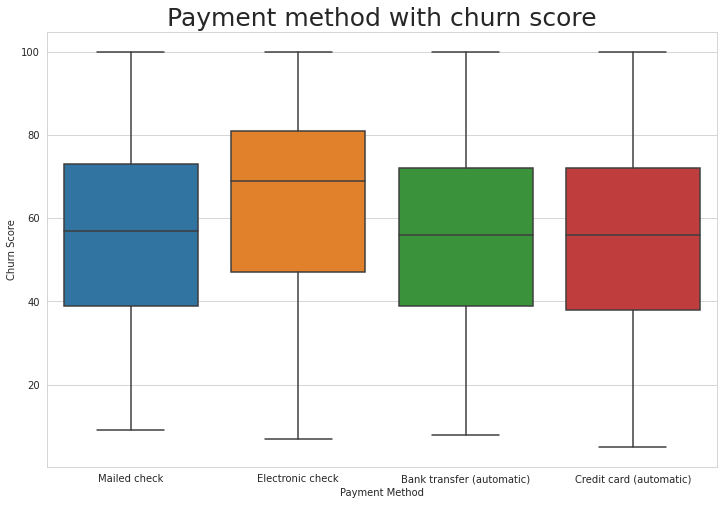

In [ ]:
sns.set_style("whitegrid")# for boxplot appling white grid pattren
plt.figure(figsize=(12,8))
plt.title("Payment method with churn score",size=25)# assigning the tittle label
sns.boxplot(tel['Payment Method'], tel['Churn Score'])
plt.show()# printing the result


#Q9: Please create an appropriate plot to check the count of payment methods and explain it.

* Electronic check is  highest counting payment menthod as compare the mailed check, bank transfer, credit card (automatic).
* second place is Mailed check.
* Third place is Bank Transfer(automatic).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


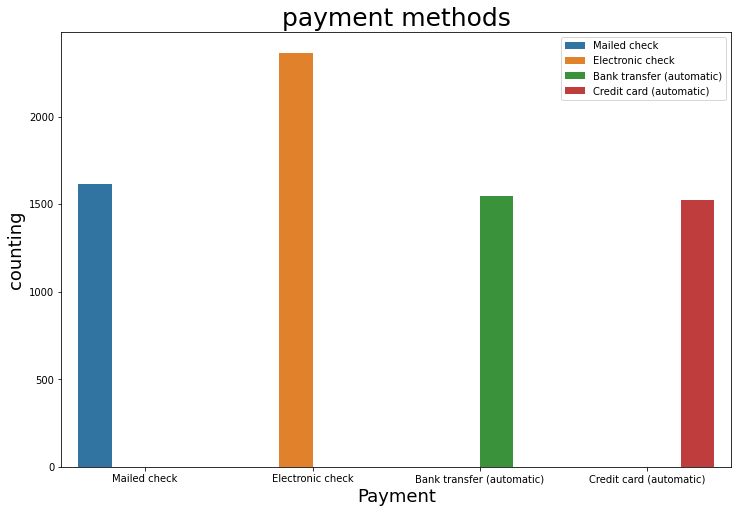

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(tel['Payment Method'],hue= tel['Payment Method'])# Creating the count plot on payment method
plt.title("payment methods", size=25)# assigning the tittle label
plt.xlabel('Payment', size=18)# assigning the x-axsis label
plt.ylabel('counting', size=18)# assigning the y-axsis label
plt.legend()
plt.show()# printing the result


#Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

*  scatter plot shows that on increasing the total charges, monthly charges also increasing.
*  scatter plot shows that perfect positive corelation scatter plot
*  Both total charges and monhly charges are corelated and proposnal to each other

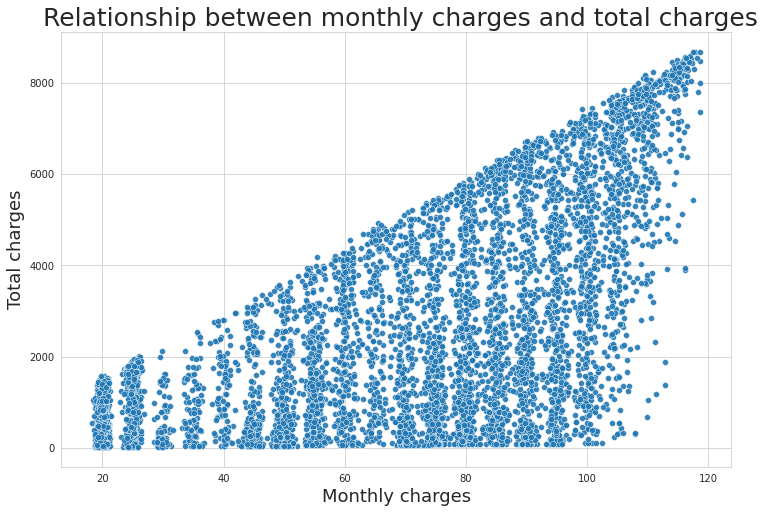

In [ ]:
plt.figure(figsize=(12,8))
#  creating  a scatterplot 
sns.scatterplot(x=tel['Monthly Charges'],y=to['Total Charges'],alpha=.9)
plt.title(" Relationship between monthly charges and total charges",size=25)# assigning the tittle label
plt.xlabel('Monthly charges', size=18)# assigning the x-axsis label
plt.ylabel('Total charges', size=18)# assigning the y-axsis label

plt.show()# printing the result

# Conclusion 

 The dataset has analysed and catagorised the data in statsically and also python reading the data.Unexpected Data Types, python  reading wrong datatype .converting all binary columns into 0 and 1 .  Electronic check is highest churn score and bank transfer ,credit card (automatic) as low churn score.increasing the total charges, monthly charges also increasing and perfect positive corelation scatter plot .performing the different plots for better results 